In [56]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [57]:
print("hello")

hello


In [58]:
# 1.Data
df = pd.read_csv('dengue_features_train.csv')
df_labels = pd.read_csv('dengue_labels_train.csv')

In [59]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [60]:
df_labels.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [61]:
#Here I am analysing the dataset for missing values, also to see which
#categorical variables need encoding, and if there is anything we want
#to get rid of.
df2 = df.merge(df_labels, how='inner')
df2.dtypes




city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [62]:
#Values of cities, and other things related to categorical variables
df2.city.unique()
obj_df2 = df2.select_dtypes(include=['object']).copy()
obj_df2.head()
obj_df2[obj_df2.isnull().any(axis=1)]




,city,week_start_date


In [63]:
#Let's check the other variables

#This one tells me every single row with missing variables, too much
#info for now
#df2[df2.isnull().any(axis=1)]

#This one counts per column
df2.isnull().sum()

#This column has a lot of nulls. But it is not so useful to 
#do too much here because it's a variable with lots of decimal points
#df2["ndvi_ne"].value_counts()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [64]:

df2["ndvi_ne"].mean() #mean : 0.14229353741679882
df2= df2.fillna({"ndvi_ne": df2["ndvi_ne"].mean()})
df2.isnull().sum()


city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                  52
ndvi_se                                  22
ndvi_sw                                  22
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                       43
station_diur_temp_rng_c                  43
station_max_temp_c                       20
station_min_temp_c              

In [65]:

#Good, for now I am going to leave the variable cleaning at that
# but we'll come back to it later.
df2.select_dtypes(include=['object']).copy()
df2.city.unique()
df2["city"].value_counts()
df2 = pd.get_dummies(df2, columns=["city"], prefix=["city"], 
                     dummy_na=True)
df2.isnull().sum()
df2.shape

#df3['city'] = pd.Categorical(df3.city)
#df3.loc[:,city] = pd.Categorical(df3.city)

(1456, 27)

In [66]:
df2.dtypes

year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

0 461


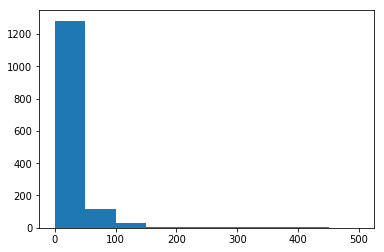

In [67]:
#I want to check the distribution for the target variable
print(df2.total_cases.min(), df2.total_cases.max())
bin_edges = [0,50,100,150,200,250,300,350,400,450,500]
total_cases_dist = plt.hist(df2['total_cases'], bins=bin_edges)

Reg score: 0.005505846804764514


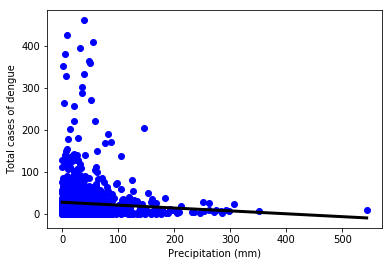

In [68]:
#Let's fit our model with a single variable. I like the look 
#of station_precip_mm

#Checking variable
df2['station_precip_mm'].value_counts()
#print(df2.station_precip_mm.min(), df2.station_precip_mm.max())
df2= df2.fillna({"station_precip_mm": df2["station_precip_mm"].mean()})

#Choosing variables
X_precipitation = df2['station_precip_mm'].values.reshape(-1,1)
y = df2['total_cases'].values.reshape(-1,1)
#print(X_precipitation.shape,y.shape)

#Fitting linear model with one variable
reg = LinearRegression()
prediction_space = np.linspace(min(X_precipitation),
                               max(X_precipitation)).reshape(-1,1)
reg.fit(X_precipitation, y)
y_predicted = reg.predict(prediction_space)

#Checking score
print("Reg score:", reg.score(X_precipitation,y))

plt.plot(X_precipitation, y, 'o', color='blue')
plt.xlabel("Precipitation (mm)")
plt.ylabel("Total cases of dengue")
plt.plot(prediction_space, y_predicted, color='black', linewidth=3)

In [69]:
df3 = df2.select_dtypes(include=['float64'])
for col in (df3):
    df2= df2.fillna({col:df2[col].mean()})
df2.isnull().sum()
df2 = df2.drop('city_nan', axis=1)

In [70]:
df2.dtypes

year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [81]:
#df2 = df2.drop('week_start_date', axis=1)

#Now let's fit all the variables to the linear regression

#Choosing variables
X = df2.drop('total_cases', axis=1)#.reshape(-1,1)
y = df2['total_cases'].values#.reshape(-1,1)
print(X.shape,y.shape)



(1456, 24) (1456,)


In [82]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
print('Number of coeficients:', len(reg.coef_))

Number of coeficients: 24


In [90]:
print(reg.coef_)
#df2 = df2.drop('total_cases', axis=1)
#df4 = pd.DataFrame(dict(zip(df2.columns, reg.coef_)), columns = ['features', 'estimatedCoeffs'])

[-1.73256128e+00  4.25918929e-01 -3.80076711e-01  1.92371824e+00
 -1.92474063e+01  2.67466632e+01 -1.30135812e-02  5.83554040e+00
 -6.51346903e+00 -1.74674460e+01  3.94345138e-01 -2.77739744e-01
 -1.54980633e-03 -6.51759163e-01 -1.30135812e-02  2.30749949e+01
 -1.60719620e+00 -2.08504421e+00 -1.66849095e+00  2.52387282e+00
 -2.25639191e-01  4.12985846e-03 -7.36179908e-01  7.36179908e-01]


In [91]:
reg.predict(X)

array([36.58292425, 42.22652189, 49.32033915, ...,  3.52424926,
       -4.9660809 , -6.60516097])

Text(0.5,1,'Dengue cases versus predicted cases')

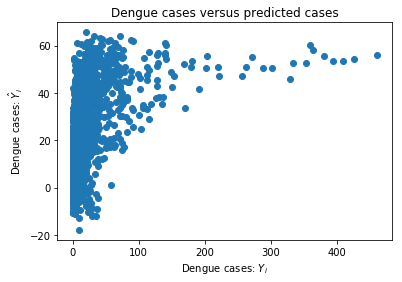

In [92]:
plt.scatter(y, reg.predict(X))
plt.xlabel("Dengue cases: $Y_i$")
plt.ylabel("Dengue cases: $\hat{Y}_i$")
plt.title("Dengue cases versus predicted cases")

In [93]:
print("Reg score:", reg.score(X,y))

Reg score: 0.18257495312362715


In [ ]:
#Now let's repear but using train-test-split

In [95]:

#sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
#plt.show()

In [96]:
#Testing linear regression minus categorical and date variables 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

In [97]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Standard deviation actual target data: {}".format(np.std(y)))
print("Mean actual target data: {}".format(np.mean(y)))

R^2: 0.1752544163250439
Root Mean Squared Error: 45.09484277851108
Standard deviation actual target data: 43.581026437725704
Mean actual target data: 24.67513736263736


In [98]:
#Now we are going to try 5 fold cross validation with Rsquared
reg = linear_model.LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv = 5)
print(cv_scores)
print("Average cv score: {}".format(np.mean(cv_scores)))
cv_scores = cross_val_score(reg, X, y, cv = 10)
print(cv_scores)
#OMG this model is terrible
print("Average cv score: {}".format(np.mean(cv_scores)))

[-0.04952504  0.05662513 -0.65859904 -0.30805853 -1.86810054]
Average cv score: -0.5655316027407309
[-0.06766889 -0.04316838  0.03187816 -0.08652282 -0.54345208  0.02822815
  0.02079958 -0.73036501 -0.65476643 -1.47113705]
Average cv score: -0.3516174775656037


([<matplotlib.axis.XTick at 0x7fe7ae0f3c18>,
 <a list of 22 Text xticklabel objects>)

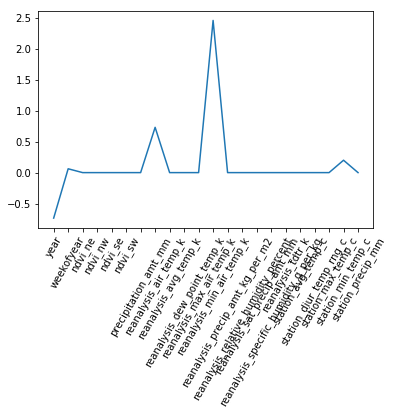

In [51]:
#Lasso 1
names = df2.drop('total_cases', axis=1).columns
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X,y).coef_
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)

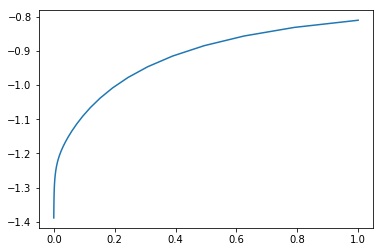

In [45]:
#Lasso 2
alpha_array = np.logspace(-5,0,50)
ridgeScores = []
ridgeSTD = []
ridge = Ridge(normalize=True)

for alpha in alpha_array:
    ridge.alpha=alpha
    ridgeCVScores = cross_val_score(ridge, X,y,cv=10)
    ridgeScores.append(np.mean(ridgeCVScores))
    ridgeSTD.append(np.std(ridgeCVScores))

plt.plot(alpha_array, ridgeScores)

In [11]:
#Testing XGBoost with base trees
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state=42)
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 15, seed = 46)
xg_reg.fit(X_train, y_train)
predictions = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 24.03215544971929


In [12]:
#Testing XGBoost with base lines
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)
params = {"booster":"gblinear", "objective":"reg:linear"}
xg_reg = xgb.train(params=params, dtrain=DM_train,num_boost_round=15)
predictions = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: {}".format(rmse))




Root Mean Squared Error: 28.771952857419794


In [67]:
#Cross validation for XGBoost
dmatrix_XGB = xgb.DMatrix(data = X, label = y)
params = {"objective":"reg:linear", "max_depth": 5}
cv_xgb_result = xgb.cv(dtrain=dmatrix_XGB, params=params, nfold=5, num_boost_round=5, 
                       metrics="rmse", as_pandas = True, seed=46)
print(cv_xgb_result)

[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:10:34] /work

In [75]:
#l1 Regularization with XGBoost
deng_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:linear","max_depth":4}
l1_params = [1,10,100]
rmes_l1 = []

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=deng_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse", 
                       as_pandas=True, seed = 123)
    rmes_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])


[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /work

[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:37:41] /work

In [77]:
print("rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params,rmes_l1)), columns=["l1","rmse"]))

rmse as a function of l1:
    l1       rmse
0    1  21.819391
1   10  21.621087
2  100  21.929146


In [78]:
#l2 Regularization with XGBoost
deng_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:linear","max_depth":4}
l2_params = [1,10,100]
rmes_l2 = []

for reg in l1_params:
    params["lambda"] = reg
    cv_results = xgb.cv(dtrain=deng_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse", 
                       as_pandas=True, seed = 123)
    rmes_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])


[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /work

[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] /work

In [79]:
print("rmse as a function of l2:")
print(pd.DataFrame(list(zip(l2_params,rmes_l2)), columns=["l2","rmse"]))

rmse as a function of l2:
    l2       rmse
0    1  22.112433
1   10  22.312546
2  100  25.226121


[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:07:36] /workspace/sr

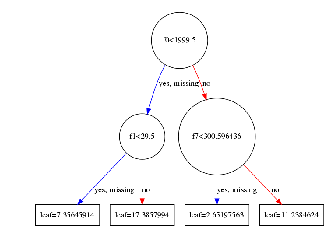

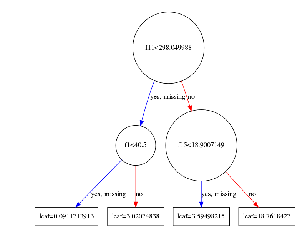

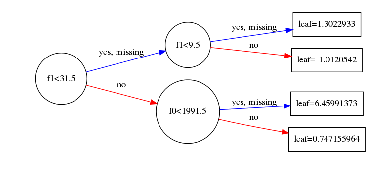

In [86]:
deng_dmatrix = xgb.DMatrix(data=X, label=y)

params = {"objective":"reg:linear", "max_depth":2}
xg_reg = xgb.train(params=params, dtrain=deng_dmatrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

xgb.plot_tree(xg_reg,num_trees=4)
plt.show()

xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()

[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:10:57] /work

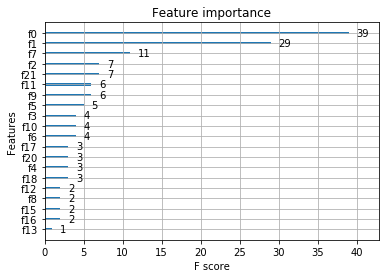

In [87]:
# Create the DMatrix: housing_dmatrix
deng_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=deng_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()